In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data sources
covid_data = "Resources/CovidNumbers.csv"
covid_daily_count = "Resources/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv"
March_2019_turnstile = "Resources/Turnstile_190330.csv"
March_2020_turnstile = "Resources/Turnstile_200328.csv"

In [30]:
#read the covid case rate csv file
#data-by-modzcta.csv
#This file contains data by modified ZIP code tabulation areas (ZCTA). 
#This unit of geography is similar to ZIP codes but combines census blocks with smaller populations to allow more stable estimates of population size for rate calculation. 
#Please see description of modified ZCTAs in the technical notes section (Geography: Zip codes and ZCTAs).
#data as of 9/25/20

covid_pd = pd.read_csv(covid_data, header = 8)

covid_pd.head()

,\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [31]:
#renamed the column
covid_clean_df = covid_pd.rename(columns = {"\outl0\strokewidth0 \strokec2 MODIFIED_ZCTA": "Modified_ZCTA"})
covid_clean_df.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS\
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,459.0,1947.97,23563.03,27.0,114.59,5.53,8299\
1,10002,Chinatown/Lower East Side,Manhattan,1371.0,1786.19,76755.41,161.0,209.76,6.61,20729\
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,584.0,1085.47,53801.62,35.0,65.05,3.07,19041\
3,10004,Financial District,Manhattan,45.0,1232.67,3650.61,1.0,27.39,4.43,1015\
4,10005,Financial District,Manhattan,109.0,1298.22,8396.11,2.0,23.82,4.24,2569\


In [32]:
#created a new DF with ZIP Code, Neighborhood names, Borough, and COVID case rate
columns_to_extract = ["Modified_ZCTA", "NEIGHBORHOOD_NAME", "BOROUGH_GROUP", "COVID_CASE_RATE"]
covid_case_rate = pd.DataFrame(covid_clean_df, columns = columns_to_extract)

print(covid_case_rate.shape)

covid_case_rate.head()

(178, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,1947.97
1,10002,Chinatown/Lower East Side,Manhattan,1786.19
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,1085.47
3,10004,Financial District,Manhattan,1232.67
4,10005,Financial District,Manhattan,1298.22


In [33]:
#sorted the covid case rate from the highest to lowest
covid_case_rate = covid_case_rate.sort_values(by=["COVID_CASE_RATE"], ascending = False)

covid_case_rate.head()

,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27
142,11372,Jackson Heights,Queens,4561.81


In [34]:
#pulled 4 neighborhoods with the highest covid cases
covid_case_max = covid_case_rate.nlargest(4, "COVID_CASE_RATE")
print(covid_case_max.shape)

covid_case_max.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
140,11369,Airport/East Elmhurst,Queens,4837.88
125,11239,East New York,Brooklyn,4688.49
139,11368,Corona/North Corona,Queens,4627.48
74,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,Bronx,4602.27


In [35]:
#pulled 4 neighborhoods with the lowest covid cases
covid_case_min = covid_case_rate.nsmallest(4, "COVID_CASE_RATE")
print(covid_case_min.shape)

covid_case_min.head()

(4, 4)


,Modified_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_RATE
42,10280,Battery Park City,Manhattan,675.77
6,10007,TriBeCa,Manhattan,933.36
10,10012,Greenwich Village/SoHo,Manhattan,1000.78
102,11215,Gowanus/Park Slope/Windsor Terrace,Brooklyn,1042.44


In [36]:
#NYC Open Data = Daily count of NYC residents who tested positive for SARS-CoV-2, who were hospitalized with COVID-19, 
#and deaths among COVID-19 patients
#read the COVID daily count csv file
covid_count = pd.read_csv(covid_daily_count)

covid_count

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,2/29/20,1,11,0
1,3/1/20,0,4,0
2,3/2/20,0,21,0
3,3/3/20,2,20,0
4,3/4/20,5,22,0
...,...,...,...,...
207,9/23/20,377,31,3
208,9/24/20,308,24,4
209,9/25/20,197,16,1
210,9/26/20,55,0,1


In [37]:
#read the March 2019 MTA Subway Ridership Data csv file
march_2019_data = pd.read_csv(March_2019_turnstile, header = 9)
march_2019_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DAY,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,0:00:00,REGULAR,6989774.0,0002370411 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,4:00:00,REGULAR,6989795.0,0002370413 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,8:00:00,REGULAR,6989813.0,0002370436 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,12:00:00,REGULAR,6989924.0,0002370512 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/23/19,SUNDAY,16:00:00,REGULAR,6990200.0,0002370573 ...


In [38]:
#read March 2020 MTA Subway Ridership Data csv file
march_2020_data = pd.read_csv(March_2020_turnstile, header = 9)
march_2020_data.head()

,\outl0\strokewidth0 \strokec2 C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DAY,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,0:00:00,REGULAR,7411940.0,2515962.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,4:00:00,REGULAR,7411942.0,2515966.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,8:00:00,REGULAR,7411945.0,2515979.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,12:00:00,REGULAR,7411969.0,2516000.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,3/21/20,SUNDAY,16:00:00,REGULAR,7412028.0,2516024.0


In [39]:
#renamed the column to EXIT and create a new DF with neccessary data for March 2019
mar_2019 = march_2019_data.columns[-1]
march_2019_data = march_2019_data.rename(columns = {mar_2019: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', "DAY", 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2019_df = pd.DataFrame(march_2019_data, columns = columns_to_use)

march_2019_df.head()

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/23/19,SUNDAY,0:00:00,REGULAR,6989774.0,0002370411 ...
1,02-00-00,59 ST,NQR456W,3/23/19,SUNDAY,4:00:00,REGULAR,6989795.0,0002370413 ...
2,02-00-00,59 ST,NQR456W,3/23/19,SUNDAY,8:00:00,REGULAR,6989813.0,0002370436 ...
3,02-00-00,59 ST,NQR456W,3/23/19,SUNDAY,12:00:00,REGULAR,6989924.0,0002370512 ...
4,02-00-00,59 ST,NQR456W,3/23/19,SUNDAY,16:00:00,REGULAR,6990200.0,0002370573 ...


In [40]:
#created a new DF with targeted neighborhoods in 2019
newdf_2019 = march_2019_df.loc[(march_2019_df["STATION"] == "E 180 ST") |
                          (march_2019_df["STATION"] == "86 ST-2 AVE") |
                          (march_2019_df["STATION"] == "96 ST") |
                          (march_2019_df["STATION"] == "CITY HALL") |
                             (march_2019_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2019_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2019_df["STATION"] == "BROADWAY JCT") |
                               (march_2019_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2019_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2019_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2019

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
8271,00-00-00,CITY HALL,NRW,3/23/19,SUNDAY,0:00:00,REGULAR,7127334.0,0004371361 ...
8272,00-00-00,CITY HALL,NRW,3/23/19,SUNDAY,4:00:00,REGULAR,7127338.0,0004371367 ...
8273,00-00-00,CITY HALL,NRW,3/23/19,SUNDAY,8:00:00,REGULAR,7127339.0,0004371370 ...
8274,00-00-00,CITY HALL,NRW,3/23/19,SUNDAY,12:00:00,REGULAR,7127356.0,0004371391 ...
8275,00-00-00,CITY HALL,NRW,3/23/19,SUNDAY,16:00:00,REGULAR,7127390.0,0004371434 ...
...,...,...,...,...,...,...,...,...,...
194564,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,SATURDAY,9:47:43,REGULAR,117440512.0,0000000162 \
194565,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,SATURDAY,11:00:32,REGULAR,117440512.0,0000000162 \
194566,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,SATURDAY,12:00:00,REGULAR,117440512.0,0000000162 \
194567,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/29/19,SATURDAY,16:00:00,REGULAR,117440512.0,0000000162 \


In [41]:
#renamed the column to EXIT and create a new DF with neccessary data for March 2020
mar_2020 = march_2020_data.columns[-1]
march_2020_data = march_2020_data.rename(columns = {mar_2020: "EXIT"})
columns_to_use = ['SCP', 'STATION','LINENAME', 'DATE', "DAY", 'TIME', 'DESC', 'ENTRIES','EXIT']
march_2020_df = pd.DataFrame(march_2020_data, columns = columns_to_use)

march_2020_df.head()

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
0,02-00-00,59 ST,NQR456W,3/21/20,SUNDAY,0:00:00,REGULAR,7411940.0,2515962.0
1,02-00-00,59 ST,NQR456W,3/21/20,SUNDAY,4:00:00,REGULAR,7411942.0,2515966.0
2,02-00-00,59 ST,NQR456W,3/21/20,SUNDAY,8:00:00,REGULAR,7411945.0,2515979.0
3,02-00-00,59 ST,NQR456W,3/21/20,SUNDAY,12:00:00,REGULAR,7411969.0,2516000.0
4,02-00-00,59 ST,NQR456W,3/21/20,SUNDAY,16:00:00,REGULAR,7412028.0,2516024.0


In [42]:
#created a new DF with targeted neighborhoods in 2020
newdf_2020 = march_2020_df.loc[(march_2020_df["STATION"] == "E 180 ST") |
                          (march_2020_df["STATION"] == "86 ST-2 AVE") |
                          (march_2020_df["STATION"] == "96 ST") |
                          (march_2020_df["STATION"] == "CITY HALL") |
                             (march_2020_df["STATION"] == "ATL AV-BARCLAY") |
                             (march_2020_df["STATION"] == "W 4 ST-WASH SQ") |
                              (march_2020_df["STATION"] == "BROADWAY JCT") |
                               (march_2020_df["STATION"] == "JKSN HT-ROOSVLT") |
                                (march_2020_df["STATION"] == "WORLD TRADE CTR") |
                                 (march_2020_df["STATION"] == "QUEENSBORO PLZ")]
newdf_2020

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
8032,00-00-00,CITY HALL,NRW,3/21/20,SUNDAY,0:00:00,REGULAR,5524.0,5348.0
8033,00-00-00,CITY HALL,NRW,3/21/20,SUNDAY,4:00:00,REGULAR,5524.0,5350.0
8034,00-00-00,CITY HALL,NRW,3/21/20,SUNDAY,8:00:00,REGULAR,5524.0,5352.0
8035,00-00-00,CITY HALL,NRW,3/21/20,SUNDAY,12:00:00,REGULAR,5527.0,5357.0
8036,00-00-00,CITY HALL,NRW,3/21/20,SUNDAY,16:00:00,REGULAR,5536.0,5365.0
...,...,...,...,...,...,...,...,...,...
197531,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,SATURDAY,4:00:00,REGULAR,117440512.0,192.0
197532,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,SATURDAY,8:00:00,REGULAR,117440512.0,192.0
197533,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,SATURDAY,12:00:00,REGULAR,117440512.0,192.0
197534,1/5/01,ATL AV-BARCLAY,BDNQR2345,3/27/20,SATURDAY,16:00:00,REGULAR,117440512.0,192.0


In [43]:
#found the highest cumulative entries count based on station, line name, SCP for March 2019
march_2019_max = newdf_2019.groupby(["STATION", "LINENAME","SCP"]).max()

march_2019_max

DATE        DAY     TIME     DESC  \
STATION         LINENAME SCP                                              
86 ST-2 AVE     Q        00-00-00  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-01  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-02  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-03  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-05-00  3/29/19  WEDNESDAY  9:00:00  REGULAR   
...                                    ...        ...      ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/00    3/25/19    TUESDAY  8:00:00  REGULAR   
                         1/6/01    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/02    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/03    3/29/19  WEDNESDAY  8:00:00  REGULAR   

                                      ENTRIES  \
STATION         LINENAME SCP                    
86 ST-2 AVE     Q        00-00-00   3652121.0   
                         00-00-01   2671740.0   
                         00-00-02   2141046.0   
                         00-00-03   1322707.0   
                         00-05-00  36570013.0   
...                                       ...   
WORLD TRADE CTR ACE23    1/5/01           0.0   
                         1/6/00      261000.0   
                         1/6/01      100900.0   
                         1/6/02      604961.0   
                         1/6/03      140171.0   

                                                                                EXIT  
STATION         LINENAME SCP                                                          
86 ST-2 AVE     Q        00-00-00  0002153115                                    ...  
                         00-00-01  0001177733                                    ...  
                         00-00-02  0001084700                                    ...  
                         00-00-03  0000951102                                    ...  
                         00-05-00  0050331652                                    ...  
...                                                                              ...  
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \  
                         1/6/00      0000060649                                    \  
                         1/6/01      0000022901                                    \  
                         1/6/02      0000159598                                    \  
                         1/6/03      0000067081                                    \  

[187 rows x 6 columns]

In [44]:
#found the highest cumulative entries count based on station, line name, SCP for March 2020
march_2020_max = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).max()

march_2020_max

DATE        DAY     TIME     DESC  \
STATION         LINENAME SCP                                              
86 ST-2 AVE     Q        00-00-00  3/27/20  WEDNESDAY  9:00:00  REGULAR   
                         00-00-01  3/27/20  WEDNESDAY  9:00:00  REGULAR   
                         00-00-02  3/27/20  WEDNESDAY  9:00:00  REGULAR   
                         00-00-03  3/27/20  WEDNESDAY  9:00:00  REGULAR   
                         00-05-00  3/27/20  WEDNESDAY  9:00:00  REGULAR   
...                                    ...        ...      ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/27/20  WEDNESDAY  8:00:00  REGULAR   
                         1/6/00    3/27/20  WEDNESDAY  8:00:00  REGULAR   
                         1/6/01    3/27/20  WEDNESDAY  8:00:00  REGULAR   
                         1/6/02    3/27/20  WEDNESDAY  8:00:00  REGULAR   
                         1/6/03    3/27/20  WEDNESDAY  8:00:00  REGULAR   

                                      ENTRIES        EXIT  
STATION         LINENAME SCP                               
86 ST-2 AVE     Q        00-00-00   5302061.0   2988082.0  
                         00-00-01   3876825.0   1629249.0  
                         00-00-02   3073461.0   1544023.0  
                         00-00-03   2042798.0   1461538.0  
                         00-05-00  36570313.0  50331652.0  
...                                       ...         ...  
WORLD TRADE CTR ACE23    1/5/01           0.0       708.0  
                         1/6/00      403205.0    107304.0  
                         1/6/01      401947.0     92897.0  
                         1/6/02     1033710.0    281265.0  
                         1/6/03      619858.0    307132.0  

[189 rows x 6 columns]

In [45]:
#found the lowest cumulative entries count based on station, line name, SCP for March 2019
march_2019_min = newdf_2019.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2019_min

DATE     DAY      TIME     DESC  \
STATION         LINENAME SCP                                            
86 ST-2 AVE     Q        00-00-00  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-01  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-02  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-03  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-05-00  3/23/19  FRIDAY  13:00:00  REGULAR   
...                                    ...     ...       ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/00    3/23/19  MONDAY   0:00:00  REGULAR   
                         1/6/01    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/02    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/03    3/23/19  FRIDAY   0:00:00  REGULAR   

                                      ENTRIES  \
STATION         LINENAME SCP                    
86 ST-2 AVE     Q        00-00-00   3619381.0   
                         00-00-01   2648355.0   
                         00-00-02   2122526.0   
                         00-00-03   1309084.0   
                         00-05-00  36570002.0   
...                                       ...   
WORLD TRADE CTR ACE23    1/5/01           0.0   
                         1/6/00      260549.0   
                         1/6/01       95007.0   
                         1/6/02      597179.0   
                         1/6/03      131580.0   

                                                                                EXIT  
STATION         LINENAME SCP                                                          
86 ST-2 AVE     Q        00-00-00  0002134693                                    ...  
                         00-00-01  0001167294                                    ...  
                         00-00-02  0001074938                                    ...  
                         00-00-03  0000941007                                    ...  
                         00-05-00  0050331652                                    ...  
...                                                                              ...  
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \  
                         1/6/00      0000060511                                    \  
                         1/6/01      0000021789                                    \  
                         1/6/02      0000157812                                    \  
                         1/6/03      0000063117                                    \  

[187 rows x 6 columns]

In [46]:
#found the lowest cumulative entries count based on station, line name, SCP for March 2020
march_2020_min = newdf_2020.groupby(["STATION", "LINENAME", "SCP"]).min()

march_2020_min

DATE     DAY      TIME     DESC  \
STATION         LINENAME SCP                                            
86 ST-2 AVE     Q        00-00-00  3/21/20  FRIDAY  13:00:00  REGULAR   
                         00-00-01  3/21/20  FRIDAY  13:00:00  REGULAR   
                         00-00-02  3/21/20  FRIDAY  13:00:00  REGULAR   
                         00-00-03  3/21/20  FRIDAY  13:00:00  REGULAR   
                         00-05-00  3/21/20  FRIDAY  13:00:00  REGULAR   
...                                    ...     ...       ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/21/20  FRIDAY   0:00:00  REGULAR   
                         1/6/00    3/21/20  FRIDAY   0:00:00  REGULAR   
                         1/6/01    3/21/20  FRIDAY   0:00:00  REGULAR   
                         1/6/02    3/21/20  FRIDAY   0:00:00  REGULAR   
                         1/6/03    3/21/20  FRIDAY   0:00:00  REGULAR   

                                      ENTRIES        EXIT  
STATION         LINENAME SCP                               
86 ST-2 AVE     Q        00-00-00   5298209.0   2984796.0  
                         00-00-01   3875060.0   1627996.0  
                         00-00-02   3072294.0   1542951.0  
                         00-00-03   2042042.0   1460301.0  
                         00-05-00  36570309.0  50331652.0  
...                                       ...         ...  
WORLD TRADE CTR ACE23    1/5/01           0.0       708.0  
                         1/6/00      403048.0    107204.0  
                         1/6/01      401628.0     92786.0  
                         1/6/02     1032921.0    280985.0  
                         1/6/03      619150.0    306313.0  

[189 rows x 6 columns]

In [47]:
#merged the DF with highest entries and lowest entries into one DF for March 2019
march_2019_merge = pd.merge(march_2019_max, march_2019_min, on = ["STATION", "LINENAME", "SCP"], how = "left")

march_2019_merge

DATE_x      DAY_x   TIME_x   DESC_x  \
STATION         LINENAME SCP                                              
86 ST-2 AVE     Q        00-00-00  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-01  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-02  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-00-03  3/29/19  WEDNESDAY  9:00:00  REGULAR   
                         00-05-00  3/29/19  WEDNESDAY  9:00:00  REGULAR   
...                                    ...        ...      ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/00    3/25/19    TUESDAY  8:00:00  REGULAR   
                         1/6/01    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/02    3/29/19  WEDNESDAY  8:00:00  REGULAR   
                         1/6/03    3/29/19  WEDNESDAY  8:00:00  REGULAR   

                                    ENTRIES_x  \
STATION         LINENAME SCP                    
86 ST-2 AVE     Q        00-00-00   3652121.0   
                         00-00-01   2671740.0   
                         00-00-02   2141046.0   
                         00-00-03   1322707.0   
                         00-05-00  36570013.0   
...                                       ...   
WORLD TRADE CTR ACE23    1/5/01           0.0   
                         1/6/00      261000.0   
                         1/6/01      100900.0   
                         1/6/02      604961.0   
                         1/6/03      140171.0   

                                                                              EXIT_x  \
STATION         LINENAME SCP                                                           
86 ST-2 AVE     Q        00-00-00  0002153115                                    ...   
                         00-00-01  0001177733                                    ...   
                         00-00-02  0001084700                                    ...   
                         00-00-03  0000951102                                    ...   
                         00-05-00  0050331652                                    ...   
...                                                                              ...   
WORLD TRADE CTR ACE23    1/5/01      0000000694                                    \   
                         1/6/00      0000060649                                    \   
                         1/6/01      0000022901                                    \   
                         1/6/02      0000159598                                    \   
                         1/6/03      0000067081                                    \   

                                    DATE_y   DAY_y    TIME_y   DESC_y  \
STATION         LINENAME SCP                                            
86 ST-2 AVE     Q        00-00-00  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-01  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-02  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-00-03  3/23/19  FRIDAY  13:00:00  REGULAR   
                         00-05-00  3/23/19  FRIDAY  13:00:00  REGULAR   
...                                    ...     ...       ...      ...   
WORLD TRADE CTR ACE23    1/5/01    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/00    3/23/19  MONDAY   0:00:00  REGULAR   
                         1/6/01    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/02    3/23/19  FRIDAY   0:00:00  REGULAR   
                         1/6/03    3/23/19  FRIDAY   0:00:00  REGULAR   

                                    ENTRIES_y  \
STATION         LINENAME SCP                    
86 ST-2 AVE     Q        00-00-00   3619381.0   
                         00-00-01   2648355.0   
                         00-00-02   2122526.0   
                         00-00-03   1309084.0   
                         00-05-00

In [48]:
#merged the DF with highest cumulative entries and lowest cumulative entries into one DF for March 2020
march_2020_merge = pd.merge(march_2020_max, march_2020_min, on = ["STATION", "SCP"], how = "left")

march_2020_merge

DATE_x      DAY_x   TIME_x   DESC_x   ENTRIES_x  \
STATION         SCP                                                          
86 ST-2 AVE     00-00-00  3/27/20  WEDNESDAY  9:00:00  REGULAR   5302061.0   
                00-00-01  3/27/20  WEDNESDAY  9:00:00  REGULAR   3876825.0   
                00-00-02  3/27/20  WEDNESDAY  9:00:00  REGULAR   3073461.0   
                00-00-03  3/27/20  WEDNESDAY  9:00:00  REGULAR   2042798.0   
                00-05-00  3/27/20  WEDNESDAY  9:00:00  REGULAR  36570313.0   
...                           ...        ...      ...      ...         ...   
WORLD TRADE CTR 1/5/01    3/27/20  WEDNESDAY  8:00:00  REGULAR         0.0   
                1/6/00    3/27/20  WEDNESDAY  8:00:00  REGULAR    403205.0   
                1/6/01    3/27/20  WEDNESDAY  8:00:00  REGULAR    401947.0   
                1/6/02    3/27/20  WEDNESDAY  8:00:00  REGULAR   1033710.0   
                1/6/03    3/27/20  WEDNESDAY  8:00:00  REGULAR    619858.0   

                              EXIT_x   DATE_y   DAY_y    TIME_y   DESC_y  \
STATION         SCP                                                        
86 ST-2 AVE     00-00-00   2988082.0  3/21/20  FRIDAY  13:00:00  REGULAR   
                00-00-01   1629249.0  3/21/20  FRIDAY  13:00:00  REGULAR   
                00-00-02   1544023.0  3/21/20  FRIDAY  13:00:00  REGULAR   
                00-00-03   1461538.0  3/21/20  FRIDAY  13:00:00  REGULAR   
                00-05-00  50331652.0  3/21/20  FRIDAY  13:00:00  REGULAR   
...                              ...      ...     ...       ...      ...   
WORLD TRADE CTR 1/5/01         708.0  3/21/20  FRIDAY   0:00:00  REGULAR   
                1/6/00      107304.0  3/21/20  FRIDAY   0:00:00  REGULAR   
                1/6/01       92897.0  3/21/20  FRIDAY   0:00:00  REGULAR   
                1/6/02      281265.0  3/21/20  FRIDAY   0:00:00  REGULAR   
                1/6/03      307132.0  3/21/20  FRIDAY   0:00:00  REGULAR   

                           ENTRIES_y      EXIT_y  
STATION         SCP                               
86 ST-2 AVE     00-00-00   5298209.0   2984796.0  
                00-00-01   3875060.0   1627996.0  
                00-00-02   3072294.0   1542951.0  
                00-00-03   2042042.0   1460301.0  
                00-05-00  36570309.0  50331652.0  
...                              ...         ...  
WORLD TRADE CTR 1/5/01           0.0       708.0  
                1/6/00      403048.0    107204.0  
                1/6/01      401628.0     92786.0  
                1/6/02     1032921.0    280985.0  
                1/6/03      619150.0    306313.0  

[219 rows x 12 columns]

In [49]:
#added a new column with the entry count per day for March 2019
march_2019_merge["ENTRIES CHANGE"] = march_2019_merge["ENTRIES_x"] - march_2019_merge["ENTRIES_y"]
march_2019_merge = march_2019_merge.reset_index()
march_2019_merge.head(10)

,STATION,LINENAME,SCP,DATE_x,DAY_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,DAY_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST-2 AVE,Q,00-00-00,3/29/19,WEDNESDAY,9:00:00,REGULAR,3652121.0,0002153115 ...,3/23/19,FRIDAY,13:00:00,REGULAR,3619381.0,0002134693 ...,32740.0
1,86 ST-2 AVE,Q,00-00-01,3/29/19,WEDNESDAY,9:00:00,REGULAR,2671740.0,0001177733 ...,3/23/19,FRIDAY,13:00:00,REGULAR,2648355.0,0001167294 ...,23385.0
2,86 ST-2 AVE,Q,00-00-02,3/29/19,WEDNESDAY,9:00:00,REGULAR,2141046.0,0001084700 ...,3/23/19,FRIDAY,13:00:00,REGULAR,2122526.0,0001074938 ...,18520.0
3,86 ST-2 AVE,Q,00-00-03,3/29/19,WEDNESDAY,9:00:00,REGULAR,1322707.0,0000951102 ...,3/23/19,FRIDAY,13:00:00,REGULAR,1309084.0,0000941007 ...,13623.0
4,86 ST-2 AVE,Q,00-05-00,3/29/19,WEDNESDAY,9:00:00,REGULAR,36570013.0,0050331652 ...,3/23/19,FRIDAY,13:00:00,REGULAR,36570002.0,0050331652 ...,11.0
5,86 ST-2 AVE,Q,00-05-01,3/29/19,WEDNESDAY,9:00:00,REGULAR,458752.0,0000000066 ...,3/23/19,FRIDAY,13:00:00,REGULAR,458752.0,0000000065 ...,0.0
6,86 ST-2 AVE,Q,01-00-00,3/29/19,WEDNESDAY,9:50:11,REGULAR,66549.0,0000908216 ...,3/23/19,FRIDAY,11:02:58,REGULAR,65891.0,0000899912 ...,658.0
7,86 ST-2 AVE,Q,01-00-01,3/29/19,WEDNESDAY,9:50:11,REGULAR,122315.0,0000642032 ...,3/23/19,FRIDAY,11:02:58,REGULAR,121079.0,0000636423 ...,1236.0
8,86 ST-2 AVE,Q,01-00-02,3/29/19,WEDNESDAY,9:50:11,REGULAR,223483.0,0000520022 ...,3/23/19,FRIDAY,11:02:58,REGULAR,221180.0,0000515389 ...,2303.0
9,86 ST-2 AVE,Q,01-00-03,3/29/19,WEDNESDAY,9:50:11,REGULAR,306748.0,0000351467 ...,3/23/19,FRIDAY,11:02:58,REGULAR,303133.0,0000347681 ...,3615.0


In [50]:
#added a new column with the entry count per day for March 2020
march_2020_merge["ENTRIES CHANGE"] = march_2020_merge["ENTRIES_x"] - march_2020_merge["ENTRIES_y"]
march_2020_merge = march_2020_merge.reset_index()
march_2020_merge.head(10)

,STATION,SCP,DATE_x,DAY_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,DAY_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,86 ST-2 AVE,00-00-00,3/27/20,WEDNESDAY,9:00:00,REGULAR,5302061.0,2988082.0,3/21/20,FRIDAY,13:00:00,REGULAR,5298209.0,2984796.0,3852.0
1,86 ST-2 AVE,00-00-01,3/27/20,WEDNESDAY,9:00:00,REGULAR,3876825.0,1629249.0,3/21/20,FRIDAY,13:00:00,REGULAR,3875060.0,1627996.0,1765.0
2,86 ST-2 AVE,00-00-02,3/27/20,WEDNESDAY,9:00:00,REGULAR,3073461.0,1544023.0,3/21/20,FRIDAY,13:00:00,REGULAR,3072294.0,1542951.0,1167.0
3,86 ST-2 AVE,00-00-03,3/27/20,WEDNESDAY,9:00:00,REGULAR,2042798.0,1461538.0,3/21/20,FRIDAY,13:00:00,REGULAR,2042042.0,1460301.0,756.0
4,86 ST-2 AVE,00-05-00,3/27/20,WEDNESDAY,9:00:00,REGULAR,36570313.0,50331652.0,3/21/20,FRIDAY,13:00:00,REGULAR,36570309.0,50331652.0,4.0
5,86 ST-2 AVE,00-05-01,3/27/20,WEDNESDAY,9:00:00,REGULAR,458752.0,133.0,3/21/20,FRIDAY,13:00:00,REGULAR,458752.0,133.0,0.0
6,86 ST-2 AVE,01-00-00,3/27/20,WEDNESDAY,9:00:00,REGULAR,103960.0,1329962.0,3/21/20,FRIDAY,13:00:00,REGULAR,103936.0,1329533.0,24.0
7,86 ST-2 AVE,01-00-01,3/27/20,WEDNESDAY,9:00:00,REGULAR,190957.0,925693.0,3/21/20,FRIDAY,13:00:00,REGULAR,190897.0,925366.0,60.0
8,86 ST-2 AVE,01-00-02,3/27/20,WEDNESDAY,9:00:00,REGULAR,344317.0,748339.0,3/21/20,FRIDAY,13:00:00,REGULAR,344203.0,748079.0,114.0
9,86 ST-2 AVE,01-00-03,3/27/20,WEDNESDAY,9:00:00,REGULAR,487638.0,537500.0,3/21/20,FRIDAY,13:00:00,REGULAR,487438.0,537315.0,200.0


In [51]:
#created a new DF with the station name and entries count for March 2019
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2019_entries = pd.DataFrame(march_2019_merge, columns = columns_to_use)
march_2019_entries

,STATION,ENTRIES CHANGE
0,86 ST-2 AVE,32740.0
1,86 ST-2 AVE,23385.0
2,86 ST-2 AVE,18520.0
3,86 ST-2 AVE,13623.0
4,86 ST-2 AVE,11.0
...,...,...
182,WORLD TRADE CTR,0.0
183,WORLD TRADE CTR,451.0
184,WORLD TRADE CTR,5893.0
185,WORLD TRADE CTR,7782.0


In [52]:
#created a new DF with the station name and entries count for March 2020
columns_to_use = ['STATION','ENTRIES CHANGE']
march_2020_entries = pd.DataFrame(march_2020_merge, columns = columns_to_use)
march_2020_entries

,STATION,ENTRIES CHANGE
0,86 ST-2 AVE,3852.0
1,86 ST-2 AVE,1765.0
2,86 ST-2 AVE,1167.0
3,86 ST-2 AVE,756.0
4,86 ST-2 AVE,4.0
...,...,...
214,WORLD TRADE CTR,0.0
215,WORLD TRADE CTR,157.0
216,WORLD TRADE CTR,319.0
217,WORLD TRADE CTR,789.0


In [53]:
#renamed the column and get the sum of total entry counts for each station of March 2019
station_change = march_2019_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2019df = pd.DataFrame(station_change)
change_2019df['TOTAL ENTRIES'] = change_2019df['TOTAL ENTRIES'].astype('int64')
change_2019df

,TOTAL ENTRIES
STATION,
86 ST-2 AVE,159528
96 ST,382718
ATL AV-BARCLAY,268299
BROADWAY JCT,55019
CITY HALL,35982
E 180 ST,44292
JKSN HT-ROOSVLT,317551
QUEENSBORO PLZ,114158
W 4 ST-WASH SQ,265487


In [54]:
#renamed the column and get the sum of total entry counts for each station of March 2020
station_change = march_2020_entries.groupby(["STATION"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
change_2020df = pd.DataFrame(station_change)
change_2020df['TOTAL ENTRIES'] = change_2020df['TOTAL ENTRIES'].astype('int64')
change_2020df

,TOTAL ENTRIES
STATION,
86 ST-2 AVE,12829
96 ST,104596
ATL AV-BARCLAY,37918
BROADWAY JCT,18936
CITY HALL,2329
E 180 ST,14040
JKSN HT-ROOSVLT,53313
QUEENSBORO PLZ,11877
W 4 ST-WASH SQ,18250


In [55]:
#created a new DF with total entry counts for 2019 and 2020
total_2019 = change_2019df["TOTAL ENTRIES"].sum()
total_2020 = change_2020df["TOTAL ENTRIES"].sum()

march_ridership = pd.DataFrame({"2019": [total_2019], "2020": [total_2020]})
march_ridership['2019'] = march_ridership['2019'].astype('int64')
march_ridership['2020'] = march_ridership['2020'].astype('int64')

march_ridership.head()

,2019,2020
0,1733907,280988


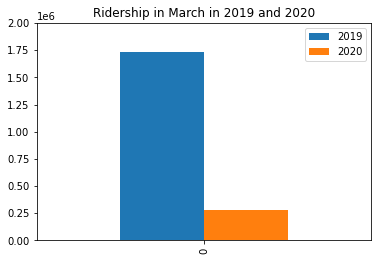

In [56]:
#created a bar graph for Subway Ridership in March
march_chart = march_ridership.plot(kind ="bar", title = "Ridership in March in 2019 and 2020")
plt.ylim(0, 2000000)

plt.savefig("Resources/Ridership at March in 2019 & 2020.png")
plt.show()

In [57]:
#merged into a new DF with total entries from 2019 and 2020
march_change = pd.merge(change_2019df, change_2020df, on = "STATION", how = "outer")

march_change

,TOTAL ENTRIES_x,TOTAL ENTRIES_y
STATION,,
86 ST-2 AVE,159528,12829
96 ST,382718,104596
ATL AV-BARCLAY,268299,37918
BROADWAY JCT,55019,18936
CITY HALL,35982,2329
E 180 ST,44292,14040
JKSN HT-ROOSVLT,317551,53313
QUEENSBORO PLZ,114158,11877
W 4 ST-WASH SQ,265487,18250


In [58]:
#renamed the column and found the percent change for each station
march_change = march_change.rename(columns = {"TOTAL ENTRIES_x": "Total Entries (2019)", "TOTAL ENTRIES_y": "Total Entries (2020)"})

march_change["Percent Change (%)"] = round((march_change["Total Entries (2020)"] - march_change["Total Entries (2019)"])/march_change["Total Entries (2019)"] * 100, 2)
march_change["Percent Change (%)"] = march_change["Percent Change (%)"].map("{:.2f}%".format)

march_change

,Total Entries (2019),Total Entries (2020),Percent Change (%)
STATION,,,
86 ST-2 AVE,159528,12829,-91.96%
96 ST,382718,104596,-72.67%
ATL AV-BARCLAY,268299,37918,-85.87%
BROADWAY JCT,55019,18936,-65.58%
CITY HALL,35982,2329,-93.53%
E 180 ST,44292,14040,-68.30%
JKSN HT-ROOSVLT,317551,53313,-83.21%
QUEENSBORO PLZ,114158,11877,-89.60%
W 4 ST-WASH SQ,265487,18250,-93.13%


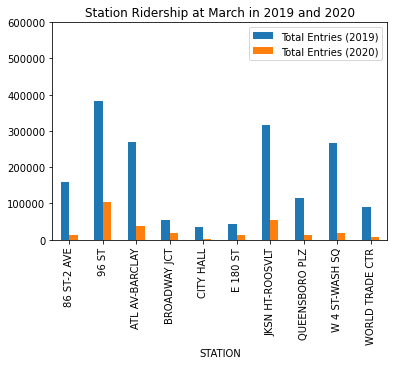

In [59]:
##created a bar graph for Subway Ridership based on stations
march_rider_chart = march_change.plot(kind = "bar", title = "Station Ridership at March in 2019 and 2020")
plt.ylim(0, 600000)

plt.savefig("Resources/Station Ridership at March in 2019 & 2020.png")
plt.show()

In [74]:
#sorted the values based on Percent Change
march_change2 = march_change.sort_values(by=["Percent Change (%)"])
march_change2

,STATION,Total Entries (2019),Total Entries (2020),Percent Change (%)
3,BROADWAY JCT,55019,18936,-65.58%
5,E 180 ST,44292,14040,-68.30%
1,96 ST,382718,104596,-72.67%
6,JKSN HT-ROOSVLT,317551,53313,-83.21%
2,ATL AV-BARCLAY,268299,37918,-85.87%
7,QUEENSBORO PLZ,114158,11877,-89.60%
0,86 ST-2 AVE,159528,12829,-91.96%
9,WORLD TRADE CTR,90873,6900,-92.41%
8,W 4 ST-WASH SQ,265487,18250,-93.13%
4,CITY HALL,35982,2329,-93.53%


In [78]:
# Was there a difference in ridership change YOY in areas with the 
# highest rates of COVID vs areas with the lowest?

In [76]:
#Create new df with 3 stations with the highest COVID rates
highcovid_df = march_change2.loc[(march_change2["STATION"] == "E 180 ST") |
                                (march_change2["STATION"] == "BROADWAY JCT") |
                                (march_change2["STATION"] == "JKSN HT-ROOSVLT")]
highcovid_df

,STATION,Total Entries (2019),Total Entries (2020),Percent Change (%)
3,BROADWAY JCT,55019,18936,-65.58%
5,E 180 ST,44292,14040,-68.30%
6,JKSN HT-ROOSVLT,317551,53313,-83.21%


In [77]:
# Create new df with 3 stations with the lowest COVID rates
lowcovid_df = march_change2.loc[(march_change2["STATION"] == "W 4 ST-WASH SQ") | 
                                (march_change2["STATION"] == "CITY HALL") |
                                (march_change2["STATION"] == "ATL AV-BARCLAY")]
lowcovid_df

,STATION,Total Entries (2019),Total Entries (2020),Percent Change (%)
2,ATL AV-BARCLAY,268299,37918,-85.87%
8,W 4 ST-WASH SQ,265487,18250,-93.13%
4,CITY HALL,35982,2329,-93.53%


In [66]:
#Was there a difference in ridership patterns in Transportation Hubs vs Residential?

In [67]:
#Create new df with Penn and UES 86th St for 2019
DOW_2019_df = march_2019_df.loc[(march_2019_df["STATION"] == "34 ST-PENN STA") | 
                                (march_2019_df["STATION"] == "86 ST-2 AVE")]
DOW_2019_df.head() 

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
112481,00-00-00,86 ST-2 AVE,Q,3/23/19,SUNDAY,1:00:00,REGULAR,3619381.0,0002134693 ...
112482,00-00-00,86 ST-2 AVE,Q,3/23/19,SUNDAY,5:00:00,REGULAR,3619439.0,0002134779 ...
112483,00-00-00,86 ST-2 AVE,Q,3/23/19,SUNDAY,9:00:00,REGULAR,3619667.0,0002135019 ...
112484,00-00-00,86 ST-2 AVE,Q,3/23/19,SUNDAY,13:00:00,REGULAR,3620548.0,0002135591 ...
112485,00-00-00,86 ST-2 AVE,Q,3/23/19,SUNDAY,17:00:00,REGULAR,3621618.0,0002136161 ...


In [68]:
#Create new df with Penn and UES 86th St for 2020
DOW_2020_df = march_2020_df.loc[(march_2020_df["STATION"] == "34 ST-PENN STA") | 
                                (march_2020_df["STATION"] == "86 ST-2 AVE")]
DOW_2020_df.head() 

,SCP,STATION,LINENAME,DATE,DAY,TIME,DESC,ENTRIES,EXIT
112789,00-00-00,86 ST-2 AVE,Q,3/21/20,SUNDAY,1:00:00,REGULAR,5298209.0,2984796.0
112790,00-00-00,86 ST-2 AVE,Q,3/21/20,SUNDAY,5:00:00,REGULAR,5298214.0,2984808.0
112791,00-00-00,86 ST-2 AVE,Q,3/21/20,SUNDAY,9:00:00,REGULAR,5298270.0,2984923.0
112792,00-00-00,86 ST-2 AVE,Q,3/21/20,SUNDAY,13:00:00,REGULAR,5298369.0,2985068.0
112793,00-00-00,86 ST-2 AVE,Q,3/21/20,SUNDAY,17:00:00,REGULAR,5298539.0,2985179.0


In [79]:
#Groupby to isolate Max for Day of Week Per Station, Line, Turnstile ID.
DOW2019_max = DOW_2019_df.groupby(["STATION", "LINENAME", "SCP","DAY"]).max()

DOW2019_max.head()

DATE     TIME     DESC  \
STATION        LINENAME SCP      DAY                                   
34 ST-PENN STA 123ACE   00-00-00 FRIDAY    3/28/19  6:00:00  REGULAR   
                                 MONDAY    3/24/19  6:00:00  REGULAR   
                                 SATURDAY  3/29/19  6:00:00  REGULAR   
                                 SUNDAY    3/23/19  6:00:00  REGULAR   
                                 THURSDAY  3/27/19  6:00:00  REGULAR   

                                             ENTRIES  \
STATION        LINENAME SCP      DAY                   
34 ST-PENN STA 123ACE   00-00-00 FRIDAY    9491179.0   
                                 MONDAY    9471801.0   
                                 SATURDAY  9495898.0   
                                 SUNDAY    9468117.0   
                                 THURSDAY  9486426.0   

                                                                                      EXIT  
STATION        LINENAME SCP      DAY                                                        
34 ST-PENN STA 123ACE   00-00-00 FRIDAY    0005423397                                    \  
                                 MONDAY    0005417074                                    \  
                                 SATURDAY  0005425170                                    \  
                                 SUNDAY    0005416711                                    \  
                                 THURSDAY  0005421597                                    \

In [80]:
#Groupby to isolate Max for Day of Week Per Station, Line, Turnstile ID.
DOW2020_max = DOW_2020_df.groupby(["STATION", "LINENAME", "SCP","DAY"]).max()

DOW2020_max.head()

DATE     TIME     DESC  \
STATION        LINENAME SCP      DAY                                   
34 ST-PENN STA 123ACE   00-00-00 FRIDAY    3/26/20  9:39:41  REGULAR   
                                 MONDAY    3/22/20  6:00:00  REGULAR   
                                 SATURDAY  3/27/20  6:00:00  REGULAR   
                                 SUNDAY    3/21/20  6:00:00  REGULAR   
                                 THURSDAY  3/25/20  6:00:00  REGULAR   

                                            ENTRIES      EXIT  
STATION        LINENAME SCP      DAY                           
34 ST-PENN STA 123ACE   00-00-00 FRIDAY    494795.0  200387.0  
                                 MONDAY    491998.0  199664.0  
                                 SATURDAY  495408.0  200583.0  
                                 SUNDAY    491550.0  199546.0  
                                 THURSDAY  494136.0  200226.0

In [81]:
#Groupby to isolate Min for Day of Week Per Station, Line, Turnstile ID.
DOW2019_min = DOW_2019_df.groupby(["STATION", "LINENAME", "SCP","DAY"]).min()

DOW2019_min.head(10)

DATE      TIME     DESC  \
STATION        LINENAME SCP      DAY                                     
34 ST-PENN STA 123ACE   00-00-00 FRIDAY     3/28/19  10:00:00  REGULAR   
                                 MONDAY     3/24/19  10:00:00  REGULAR   
                                 SATURDAY   3/29/19  10:00:00  REGULAR   
                                 SUNDAY     3/23/19  10:00:00  REGULAR   
                                 THURSDAY   3/27/19  10:00:00  REGULAR   
                                 TUESDAY    3/25/19  10:00:00  REGULAR   
                                 WEDNESDAY  3/26/19  10:00:00  REGULAR   
                        00-00-01 FRIDAY     3/28/19  10:00:00  REGULAR   
                                 MONDAY     3/24/19  10:00:00  REGULAR   
                                 SATURDAY   3/29/19  10:00:00  REGULAR   

                                              ENTRIES  \
STATION        LINENAME SCP      DAY                    
34 ST-PENN STA 123ACE   00-00-00 FRIDAY     9486859.0   
                                 MONDAY     9468597.0   
                                 SATURDAY   9491826.0   
                                 SUNDAY     9465056.0   
                                 THURSDAY   9482150.0   
                                 TUESDAY    9472162.0   
                                 WEDNESDAY  9477019.0   
                        00-00-01 FRIDAY     9630541.0   
                                 MONDAY     9612920.0   
                                 SATURDAY   9635454.0   

                                                                                       EXIT  
STATION        LINENAME SCP      DAY                                                         
34 ST-PENN STA 123ACE   00-00-00 FRIDAY     0005421762                                    \  
                                 MONDAY     0005416757                                    \  
                                 SATURDAY   0005423547                                    \  
                                 SUNDAY     0005416433                                    \  
                                 THURSDAY   0005420124                                    \  
                                 TUESDAY    0005417098                                    \  
                                 WEDNESDAY  0005418540                                    \  
                        00-00-01 FRIDAY     0005269748                                    \  
                                 MONDAY     0005264288                                    \  
                                 SATURDAY   0005271587                                    \

In [82]:
#Groupby to isolate Min for Day of Week Per Station, Line, Turnstile ID.
DOW2020_min = DOW_2020_df.groupby(["STATION", "LINENAME", "SCP","DAY"]).min()

DOW2020_min.head(10)

DATE      TIME     DESC  \
STATION        LINENAME SCP      DAY                                     
34 ST-PENN STA 123ACE   00-00-00 FRIDAY     3/26/20  10:00:00  REGULAR   
                                 MONDAY     3/22/20  10:00:00  REGULAR   
                                 SATURDAY   3/27/20  10:00:00  REGULAR   
                                 SUNDAY     3/21/20  10:00:00  REGULAR   
                                 THURSDAY   3/25/20  10:00:00  REGULAR   
                                 TUESDAY    3/23/20  10:00:00  REGULAR   
                                 WEDNESDAY  3/24/20  10:00:00  REGULAR   
                        00-00-01 FRIDAY     3/26/20  10:00:00  REGULAR   
                                 MONDAY     3/22/20  10:00:00  REGULAR   
                                 SATURDAY   3/27/20  10:00:00  REGULAR   

                                               ENTRIES       EXIT  
STATION        LINENAME SCP      DAY                               
34 ST-PENN STA 123ACE   00-00-00 FRIDAY       494182.0   200240.0  
                                 MONDAY       491601.0   199560.0  
                                 SATURDAY     494857.0   200401.0  
                                 SUNDAY       491036.0   199418.0  
                                 THURSDAY     493515.0   200058.0  
                                 TUESDAY      492054.0   199681.0  
                                 WEDNESDAY    492799.0   199883.0  
                        00-00-01 FRIDAY     11071111.0  5764592.0  
                                 MONDAY     11069308.0  5763813.0  
                                 SATURDAY   11071567.0  5764784.0

In [83]:
# Merge min and max into one df, calculate difference and add a column for Entries Change
DOW2019_merge = pd.merge(DOW2019_max, DOW2019_min, on = ["STATION", "LINENAME", "SCP", "DAY"], how = "left")

DOW2019_merge["ENTRIES CHANGE"] = DOW2019_merge["ENTRIES_x"] - DOW2019_merge["ENTRIES_y"]
DOW2019_merge = DOW2019_merge.reset_index()

DOW2019_merge.head()

,STATION,LINENAME,SCP,DAY,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,34 ST-PENN STA,123ACE,00-00-00,FRIDAY,3/28/19,6:00:00,REGULAR,9491179.0,0005423397 \,3/28/19,10:00:00,REGULAR,9486859.0,0005421762 \,4320.0
1,34 ST-PENN STA,123ACE,00-00-00,MONDAY,3/24/19,6:00:00,REGULAR,9471801.0,0005417074 \,3/24/19,10:00:00,REGULAR,9468597.0,0005416757 \,3204.0
2,34 ST-PENN STA,123ACE,00-00-00,SATURDAY,3/29/19,6:00:00,REGULAR,9495898.0,0005425170 \,3/29/19,10:00:00,REGULAR,9491826.0,0005423547 \,4072.0
3,34 ST-PENN STA,123ACE,00-00-00,SUNDAY,3/23/19,6:00:00,REGULAR,9468117.0,0005416711 \,3/23/19,10:00:00,REGULAR,9465056.0,0005416433 \,3061.0
4,34 ST-PENN STA,123ACE,00-00-00,THURSDAY,3/27/19,6:00:00,REGULAR,9486426.0,0005421597 \,3/27/19,10:00:00,REGULAR,9482150.0,0005420124 \,4276.0


In [84]:
# Merge min and max into one df, calculate difference and add a column for Entries Change
DOW2020_merge = pd.merge(DOW2020_max, DOW2020_min, on = ["STATION", "LINENAME", "SCP", "DAY"], how = "left")

DOW2020_merge["ENTRIES CHANGE"] = DOW2020_merge["ENTRIES_x"] - DOW2020_merge["ENTRIES_y"]
DOW2020_merge = DOW2020_merge.reset_index()

DOW2020_merge.head()

,STATION,LINENAME,SCP,DAY,DATE_x,TIME_x,DESC_x,ENTRIES_x,EXIT_x,DATE_y,TIME_y,DESC_y,ENTRIES_y,EXIT_y,ENTRIES CHANGE
0,34 ST-PENN STA,123ACE,00-00-00,FRIDAY,3/26/20,9:39:41,REGULAR,494795.0,200387.0,3/26/20,10:00:00,REGULAR,494182.0,200240.0,613.0
1,34 ST-PENN STA,123ACE,00-00-00,MONDAY,3/22/20,6:00:00,REGULAR,491998.0,199664.0,3/22/20,10:00:00,REGULAR,491601.0,199560.0,397.0
2,34 ST-PENN STA,123ACE,00-00-00,SATURDAY,3/27/20,6:00:00,REGULAR,495408.0,200583.0,3/27/20,10:00:00,REGULAR,494857.0,200401.0,551.0
3,34 ST-PENN STA,123ACE,00-00-00,SUNDAY,3/21/20,6:00:00,REGULAR,491550.0,199546.0,3/21/20,10:00:00,REGULAR,491036.0,199418.0,514.0
4,34 ST-PENN STA,123ACE,00-00-00,THURSDAY,3/25/20,6:00:00,REGULAR,494136.0,200226.0,3/25/20,10:00:00,REGULAR,493515.0,200058.0,621.0


In [85]:
# Create df with only necessary columns
columns_to_use = ['STATION','DAY','ENTRIES CHANGE']
DOW2019_merge = pd.DataFrame(DOW2019_merge, columns = columns_to_use)
DOW2019_merge.head()

,STATION,DAY,ENTRIES CHANGE
0,34 ST-PENN STA,FRIDAY,4320.0
1,34 ST-PENN STA,MONDAY,3204.0
2,34 ST-PENN STA,SATURDAY,4072.0
3,34 ST-PENN STA,SUNDAY,3061.0
4,34 ST-PENN STA,THURSDAY,4276.0


In [86]:
# Create df with only necessary columns
columns_to_use = ['STATION','DAY','ENTRIES CHANGE']
DOW2020_merge = pd.DataFrame(DOW2020_merge, columns = columns_to_use)
DOW2020_merge.head()

,STATION,DAY,ENTRIES CHANGE
0,34 ST-PENN STA,FRIDAY,613.0
1,34 ST-PENN STA,MONDAY,397.0
2,34 ST-PENN STA,SATURDAY,551.0
3,34 ST-PENN STA,SUNDAY,514.0
4,34 ST-PENN STA,THURSDAY,621.0


In [87]:
# Create df calculating the total change in entries per day of week per station
DOW2019_change = DOW2019_merge.groupby(["STATION","DAY"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
DOW2019_total = pd.DataFrame(DOW2019_change)
DOW2019_total

TOTAL ENTRIES
STATION        DAY                     
34 ST-PENN STA FRIDAY           49652.0
               MONDAY           25805.0
               SATURDAY         47757.0
               SUNDAY           26911.0
               THURSDAY         49662.0
               TUESDAY          48187.0
               WEDNESDAY        49532.0
86 ST-2 AVE    FRIDAY           25292.0
               MONDAY           11675.0
               SATURDAY         25200.0
               SUNDAY           15576.0
               THURSDAY         25082.0
               TUESDAY          23256.0
               WEDNESDAY        24765.0

In [88]:
# Create df calculating the total change in entries per day of week per station
DOW2020_change = DOW2020_merge.groupby(["STATION","DAY"]).sum()["ENTRIES CHANGE"].rename("TOTAL ENTRIES")
DOW2020_total = pd.DataFrame(DOW2020_change)
DOW2020_total

TOTAL ENTRIES
STATION        DAY                     
34 ST-PENN STA FRIDAY            3903.0
               MONDAY            2121.0
               SATURDAY          3338.0
               SUNDAY            2979.0
               THURSDAY          4080.0
               TUESDAY           4684.0
               WEDNESDAY         4250.0
86 ST-2 AVE    FRIDAY            1669.0
               MONDAY            1045.0
               SATURDAY          1605.0
               SUNDAY            1690.0
               THURSDAY          1745.0
               TUESDAY           1787.0
               WEDNESDAY         1903.0

In [89]:
# Create df to be used for chart 
DOW_chart = pd.merge(DOW2020_change, DOW2019_change, on = ["STATION", "DAY"], how = "left")
DOW_chart = DOW_chart.rename(columns = {"DAY": "DAY","TOTAL ENTRIES_x": "2020 Entries", 
                                              "TOTAL ENTRIES_y": "2019 Entries"})
DOW_chart = DOW_chart.reset_index()
DOW_chart

,STATION,DAY,2020 Entries,2019 Entries
0,34 ST-PENN STA,FRIDAY,3903.0,49652.0
1,34 ST-PENN STA,MONDAY,2121.0,25805.0
2,34 ST-PENN STA,SATURDAY,3338.0,47757.0
3,34 ST-PENN STA,SUNDAY,2979.0,26911.0
4,34 ST-PENN STA,THURSDAY,4080.0,49662.0
5,34 ST-PENN STA,TUESDAY,4684.0,48187.0
6,34 ST-PENN STA,WEDNESDAY,4250.0,49532.0
7,86 ST-2 AVE,FRIDAY,1669.0,25292.0
8,86 ST-2 AVE,MONDAY,1045.0,11675.0
9,86 ST-2 AVE,SATURDAY,1605.0,25200.0


In [90]:
# Isolate Penn Sta data in new df
station_to_find = "34 ST-PENN STA"               
Penn_DOW_df = DOW_chart.loc[DOW_chart["STATION"] == station_to_find]

Penn_DOW_df

,STATION,DAY,2020 Entries,2019 Entries
0,34 ST-PENN STA,FRIDAY,3903.0,49652.0
1,34 ST-PENN STA,MONDAY,2121.0,25805.0
2,34 ST-PENN STA,SATURDAY,3338.0,47757.0
3,34 ST-PENN STA,SUNDAY,2979.0,26911.0
4,34 ST-PENN STA,THURSDAY,4080.0,49662.0
5,34 ST-PENN STA,TUESDAY,4684.0,48187.0
6,34 ST-PENN STA,WEDNESDAY,4250.0,49532.0


In [93]:
# Isolate 86th St data in new df
station_to_find = "86 ST-2 AVE"               
UES_DOW_df = DOW_chart.loc[DOW_chart["STATION"] == station_to_find]

UES_DOW_df

,STATION,DAY,2020 Entries,2019 Entries
7,86 ST-2 AVE,FRIDAY,1669.0,25292.0
8,86 ST-2 AVE,MONDAY,1045.0,11675.0
9,86 ST-2 AVE,SATURDAY,1605.0,25200.0
10,86 ST-2 AVE,SUNDAY,1690.0,15576.0
11,86 ST-2 AVE,THURSDAY,1745.0,25082.0
12,86 ST-2 AVE,TUESDAY,1787.0,23256.0
13,86 ST-2 AVE,WEDNESDAY,1903.0,24765.0


In [91]:
# Use loc to fix the order of days of week for x axis
field = "DAY"
day_order = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
Penn_sort_df = Penn_DOW_df.set_index(field).loc[day_order]
Penn_sort_df = Penn_sort_df.reset_index()
Penn_sort_df

,DAY,STATION,2020 Entries,2019 Entries
0,MONDAY,34 ST-PENN STA,2121.0,25805.0
1,TUESDAY,34 ST-PENN STA,4684.0,48187.0
2,WEDNESDAY,34 ST-PENN STA,4250.0,49532.0
3,THURSDAY,34 ST-PENN STA,4080.0,49662.0
4,FRIDAY,34 ST-PENN STA,3903.0,49652.0
5,SATURDAY,34 ST-PENN STA,3338.0,47757.0
6,SUNDAY,34 ST-PENN STA,2979.0,26911.0


In [94]:
field = "DAY"
day_order = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
UES_sort_df = UES_DOW_df.set_index(field).loc[day_order]
UES_sort_df = UES_sort_df.reset_index()
UES_sort_df

,DAY,STATION,2020 Entries,2019 Entries
0,MONDAY,86 ST-2 AVE,1045.0,11675.0
1,TUESDAY,86 ST-2 AVE,1787.0,23256.0
2,WEDNESDAY,86 ST-2 AVE,1903.0,24765.0
3,THURSDAY,86 ST-2 AVE,1745.0,25082.0
4,FRIDAY,86 ST-2 AVE,1669.0,25292.0
5,SATURDAY,86 ST-2 AVE,1605.0,25200.0
6,SUNDAY,86 ST-2 AVE,1690.0,15576.0


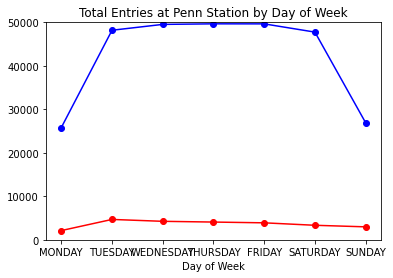

In [92]:
# Plot Penn Sta Graph
x_axis = Penn_sort_df["DAY"]
D2020_y = Penn_sort_df["2020 Entries"]
D2019_y = Penn_sort_df["2019 Entries"]

plt.plot(x_axis, D2020_y, marker = "o", label = "2020 Entries", color = "red")
plt.plot(x_axis, D2019_y, marker = "o", label = "2019 Entries", color = "blue")
plt.title("Total Entries at Penn Station by Day of Week")
plt.ylim(0, 50000)
plt.xlabel("Day of Week")
plt.show()

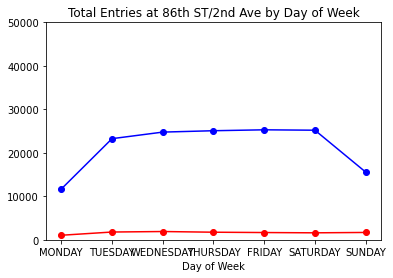

In [95]:
# Plot 86th St Graph
x_axis = UES_sort_df["DAY"]
D2020_y = UES_sort_df["2020 Entries"]
D2019_y = UES_sort_df["2019 Entries"]

plt.plot(x_axis, D2020_y, marker = "o", label = "2020 Entries", color = "red")
plt.plot(x_axis, D2019_y, marker = "o", label = "2019 Entries", color = "blue")
plt.title("Total Entries at 86th ST/2nd Ave by Day of Week")
plt.ylim(0, 50000)
plt.xlabel("Day of Week")
plt.show()

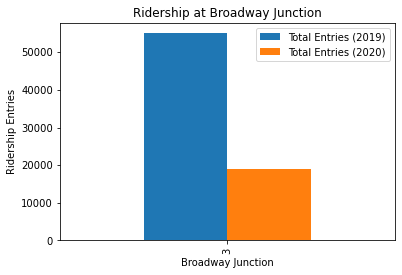

In [69]:
#found data for Broadway Junction and created a bar graph
station_to_find = "BROADWAY JCT"
march_change = march_change.reset_index()

broadway_jct_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = broadway_jct_df.plot(kind = "bar", title = "Ridership at Broadway Junction")

plt.xlabel("Broadway Junction")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Broadway Junction in 2019 & 2020.png")
plt.show()

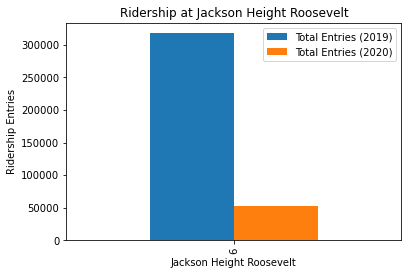

In [34]:
#found data for Jackson Height Roosevelt and created a bar graph
station_to_find = "JKSN HT-ROOSVLT"
jksn_roosvlt_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = jksn_roosvlt_df.plot(kind = "bar", title = "Ridership at Jackson Height Roosevelt")

plt.xlabel("Jackson Height Roosevelt")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at Jackson Height Roosevelt in 2019 & 2020.png")
plt.show()

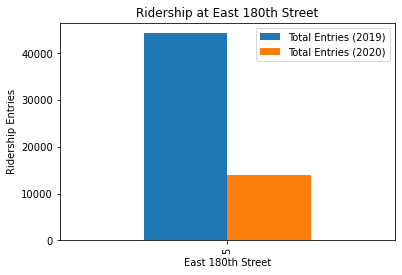

In [35]:
#found data for East 180th Street and created a bar graph
station_to_find = "E 180 ST"
east_180_df = march_change.loc[march_change["STATION"] == station_to_find]
station_chart = east_180_df.plot(kind = "bar", title = "Ridership at East 180th Street")

plt.xlabel("East 180th Street")
plt.ylabel("Ridership Entries")
plt.savefig("Resources/Ridership at East 180 Street in 2019 & 2020.png")
plt.show()

In [36]:
#found the highest cumulative entry counts based on station, line name, turnstile, and date
march_2020_datemax = newdf_2020.groupby(["STATION", "LINENAME", "SCP", "DATE"]).max()
march_2020_datemax = march_2020_datemax.rename(columns = {"ENTRIES": "Entries (End)", "EXIT": "EXIT (End)"})
march_2020_datemax

DAY     TIME     DESC  \
STATION         LINENAME SCP      DATE                                   
86 ST-2 AVE     Q        00-00-00 3/21/20     SUNDAY  9:00:00  REGULAR   
                                  3/22/20     MONDAY  9:00:00  REGULAR   
                                  3/23/20    TUESDAY  9:00:00  REGULAR   
                                  3/24/20  WEDNESDAY  9:00:00  REGULAR   
                                  3/25/20   THURSDAY  9:00:00  REGULAR   
...                                              ...      ...      ...   
WORLD TRADE CTR ACE23    1/6/03   3/23/20    TUESDAY  8:00:00  REGULAR   
                                  3/24/20  WEDNESDAY  8:00:00  REGULAR   
                                  3/25/20   THURSDAY  8:00:00  REGULAR   
                                  3/26/20     FRIDAY  8:00:00  REGULAR   
                                  3/27/20   SATURDAY  8:00:00  REGULAR   

                                           Entries (End)  EXIT (End)  
STATION         LINENAME SCP      DATE                                
86 ST-2 AVE     Q        00-00-00 3/21/20      5298678.0   2985259.0  
                                  3/22/20      5299091.0   2985630.0  
                                  3/23/20      5299674.0   2986159.0  
                                  3/24/20      5300321.0   2986668.0  
                                  3/25/20      5300925.0   2987152.0  
...                                                  ...         ...  
WORLD TRADE CTR ACE23    1/6/03   3/23/20       619339.0    306544.0  
                                  3/24/20       619480.0    306703.0  
                                  3/25/20       619611.0    306843.0  
                                  3/26/20       619739.0    306980.0  
                                  3/27/20       619858.0    307132.0  

[1301 rows x 5 columns]

In [37]:
#found the lowest cumulative entry counts based on station, line name, turnstile, and date
march_2020_datemin = newdf_2020.groupby(["STATION", "LINENAME", "SCP", "DATE"]).min()
march_2020_datemin = march_2020_datemin.rename(columns = {"ENTRIES": "Entries (Start)", "EXIT": "EXIT (start)"})
march_2020_datemin

DAY      TIME     DESC  \
STATION         LINENAME SCP      DATE                                    
86 ST-2 AVE     Q        00-00-00 3/21/20     SUNDAY  13:00:00  REGULAR   
                                  3/22/20     MONDAY  13:00:00  REGULAR   
                                  3/23/20    TUESDAY  13:00:00  REGULAR   
                                  3/24/20  WEDNESDAY  13:00:00  REGULAR   
                                  3/25/20   THURSDAY  13:00:00  REGULAR   
...                                              ...       ...      ...   
WORLD TRADE CTR ACE23    1/6/03   3/23/20    TUESDAY   0:00:00  REGULAR   
                                  3/24/20  WEDNESDAY   0:00:00  REGULAR   
                                  3/25/20   THURSDAY   0:00:00  REGULAR   
                                  3/26/20     FRIDAY   0:00:00  REGULAR   
                                  3/27/20   SATURDAY   0:00:00  REGULAR   

                                           Entries (Start)  EXIT (start)  
STATION         LINENAME SCP      DATE                                    
86 ST-2 AVE     Q        00-00-00 3/21/20        5298209.0     2984796.0  
                                  3/22/20        5298768.0     2985286.0  
                                  3/23/20        5299164.0     2985661.0  
                                  3/24/20        5299743.0     2986182.0  
                                  3/25/20        5300381.0     2986704.0  
...                                                    ...           ...  
WORLD TRADE CTR ACE23    1/6/03   3/23/20         619257.0      306424.0  
                                  3/24/20         619358.0      306552.0  
                                  3/25/20         619498.0      306714.0  
                                  3/26/20         619627.0      306850.0  
                                  3/27/20         619753.0      306990.0  

[1301 rows x 5 columns]

In [38]:
#merged 2 DFs into a new DF with both highest and lowest cumulative entries
march_2020_datemerge = pd.merge(march_2020_datemin, march_2020_datemax, on = ["STATION", "LINENAME", "SCP", "DATE", "DAY"], how = "left")
march_2020_datemerge = march_2020_datemerge.reset_index()
march_2020_datemerge["Ride Entry"] = march_2020_datemerge["Entries (End)"] - march_2020_datemerge["Entries (Start)"]
march_2020_datemerge

,STATION,LINENAME,SCP,DATE,DAY,TIME_x,DESC_x,Entries (Start),EXIT (start),TIME_y,DESC_y,Entries (End),EXIT (End),Ride Entry
0,86 ST-2 AVE,Q,00-00-00,3/21/20,SUNDAY,13:00:00,REGULAR,5298209.0,2984796.0,9:00:00,REGULAR,5298678.0,2985259.0,469.0
1,86 ST-2 AVE,Q,00-00-00,3/22/20,MONDAY,13:00:00,REGULAR,5298768.0,2985286.0,9:00:00,REGULAR,5299091.0,2985630.0,323.0
2,86 ST-2 AVE,Q,00-00-00,3/23/20,TUESDAY,13:00:00,REGULAR,5299164.0,2985661.0,9:00:00,REGULAR,5299674.0,2986159.0,510.0
3,86 ST-2 AVE,Q,00-00-00,3/24/20,WEDNESDAY,13:00:00,REGULAR,5299743.0,2986182.0,9:00:00,REGULAR,5300321.0,2986668.0,578.0
4,86 ST-2 AVE,Q,00-00-00,3/25/20,THURSDAY,13:00:00,REGULAR,5300381.0,2986704.0,9:00:00,REGULAR,5300925.0,2987152.0,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,WORLD TRADE CTR,ACE23,1/6/03,3/23/20,TUESDAY,0:00:00,REGULAR,619257.0,306424.0,8:00:00,REGULAR,619339.0,306544.0,82.0
1297,WORLD TRADE CTR,ACE23,1/6/03,3/24/20,WEDNESDAY,0:00:00,REGULAR,619358.0,306552.0,8:00:00,REGULAR,619480.0,306703.0,122.0
1298,WORLD TRADE CTR,ACE23,1/6/03,3/25/20,THURSDAY,0:00:00,REGULAR,619498.0,306714.0,8:00:00,REGULAR,619611.0,306843.0,113.0
1299,WORLD TRADE CTR,ACE23,1/6/03,3/26/20,FRIDAY,0:00:00,REGULAR,619627.0,306850.0,8:00:00,REGULAR,619739.0,306980.0,112.0


In [39]:
#found the total entries based on dates
date_change = march_2020_datemerge.groupby(["DATE"]).sum()["Ride Entry"]
march_date_pd = pd.DataFrame(date_change)
march_date_pd = march_date_pd.reset_index()
print(march_date_pd.shape)
march_date_pd.head(10)

(7, 2)


,DATE,Ride Entry
0,3/21/20,31840.0
1,3/22/20,21217.0
2,3/23/20,31746.0
3,3/24/20,33869.0
4,3/25/20,31192.0
5,3/26/20,30599.0
6,3/27/20,27682.0


In [40]:
#located the last week of March 2020 and extracted the data
date_2020 = covid_count.loc[(covid_count["DATE_OF_INTEREST"] == "3/21/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/22/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/23/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/24/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/25/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/26/20") | 
                            (covid_count["DATE_OF_INTEREST"] == "3/27/20")]

date_2020 = date_2020.rename(columns = {"DATE_OF_INTEREST": "DATE"})
date_2020

,DATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
21,3/21/20,"2,638",701,44
22,3/22/20,"2,580",725,50
23,3/23/20,"3,572","1,042",82
24,3/24/20,"4,506","1,167",95
25,3/25/20,"4,874","1,312",123
26,3/26/20,"5,051","1,454",190
27,3/27/20,"5,121","1,402",218


In [41]:
#merged 2 DFs into a new DF with station names, rider entries, and covid case rate
march_chart_pd = pd.merge(march_date_pd, date_2020, on = "DATE", how = "left")
march_chart_pd = march_chart_pd.drop(["HOSPITALIZED_COUNT", "DEATH_COUNT"], axis=1)
march_chart_pd

,DATE,Ride Entry,CASE_COUNT
0,3/21/20,31840.0,"2,638"
1,3/22/20,21217.0,"2,580"
2,3/23/20,31746.0,"3,572"
3,3/24/20,33869.0,"4,506"
4,3/25/20,31192.0,"4,874"
5,3/26/20,30599.0,"5,051"
6,3/27/20,27682.0,"5,121"


In [96]:
#created a line graph
x_axis = march_chart_pd["DATE"]
ride_y = march_chart_pd["Ride Entry"]
case_y = march_chart_pd["CASE_COUNT"]

plt.plot(x_axis, case_y, marker = "o", label = "COVID cases", color = "red")
plt.plot(x_axis, ride_y, marker = "o", label = "MTA ridership", color = "blue")
plt.title("Relationship between COVID cases and MTA Ridership in March 2020")
plt.ylim(0, 50000)
plt.xlabel("Date")
plt.show()

NameError: name 'march_chart_pd' is not defined